# Enrolled Students at UAEU in 2016-2017

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pd.set_option("display.max_rows", 999)

In [943]:
df = pd.read_excel("Enrollments2016-2017.xlsx")

In [944]:
df.head()

,ACADEMIC_YEAR_DESC,CITY,FED_NATION_OF_CITIZENSHIP_DESC,FED_GENDER_DESC,Group,Emirate,FED_PROGRAM_DESC,FED_DEGREE,FED_COLLEGE_DESC
0,2016/2017,Abu Dhabi,United Arab Emirates,Male,National,Abu Dhabi,DR of Business Administration,DR,Business & Economics
1,2016/2017,Al Ain,United Arab Emirates,Male,National,Abu Dhabi,Master of Business Admin,MS,Business & Economics
2,2016/2017,Abu Dhabi,United Arab Emirates,Male,National,Abu Dhabi,Ms. of Remote Sensing & GIS,MS,Humanities & Social Sciences
3,2016/2017,Abu Dhabi,Jordan,Male,Other Arab,Abu Dhabi,Chem. & Pete Eng & Geosciences,MS,Engineering
4,2016/2017,Ras Al Khaimah,United Arab Emirates,Female,National,Ras al-Khaimah,Master of Public Health,MS,Medicine & Health Sciences


In [945]:
df.rename(columns={'FED_NATION_OF_CITIZENSHIP_DESC':'Nationality','FED_GENDER_DESC' :'Gender','FED_PROGRAM_DESC':'Program',
'FED_DEGREE':'Degree','FED_COLLEGE_DESC':'College'},inplace=True)

In [946]:
df.isna().sum()

ACADEMIC_YEAR_DESC    0
CITY                  0
Nationality           0
Gender                0
Group                 0
Emirate               2
Program               0
Degree                0
College               0
dtype: int64

In [947]:
df[df['Emirate'].isna()]

,ACADEMIC_YEAR_DESC,CITY,Nationality,Gender,Group,Emirate,Program,Degree,College
12838,2016/2017,.,Syria,Female,Other Arab,NaN,Doctor of Philosophy,DR,Food & Agriculture
13143,2016/2017,RAK,United Arab Emirates,Female,National,NaN,Psychology,BS,Humanities & Social Sciences


In [948]:
df['Emirate'].value_counts()

Abu Dhabi                 8939
Ras al-Khaimah            1400
Fujairah                  1291
Sharjah                    817
Dubai                      681
Ajman                      335
Umm al-Qaiwain             143
Ras Al Khaimah             101
Al Fujairah                 62
Unknown                     28
Umm Al Quwain                9
Abu Dhabi (Al Marfa'a)       2
Name: Emirate, dtype: int64

In [949]:
df['Emirate'] = df['Emirate'].replace({'Ras Al Khaimah':'Ras al-Khaimah','Al Fujairah':'Fujairah','Umm Al Quwain':'Umm al-Qaiwain',"Abu Dhabi (Al Marfa'a)":'Abu Dhabi'})

In [950]:
df[df['Emirate']=='Unknown']

,ACADEMIC_YEAR_DESC,CITY,Nationality,Gender,Group,Emirate,Program,Degree,College
32,2016/2017,Al Ain,United Arab Emirates,Male,National,Unknown,Master in Private Law,MS,Law
50,2016/2017,Al Fujairah,United Arab Emirates,Female,National,Unknown,Master in Public Law,MS,Law
111,2016/2017,Al Ain,Oman,Female,GCC,Unknown,Master in Private Law,MS,Law
113,2016/2017,Al Ain,United Arab Emirates,Female,National,Unknown,Master of Education,MS,Education
117,2016/2017,Dubai,Iraq,Male,Other Arab,Unknown,Ms. in Electrical Engineering,MS,Engineering
141,2016/2017,Al Ain,United Arab Emirates,Male,National,Unknown,Master of Business Admin,MS,Business & Economics
151,2016/2017,Al Ain,Pakistan,Male,Others,Unknown,Ms. in Electrical Engineering,MS,Engineering
184,2016/2017,.,United Arab Emirates,Female,National,Unknown,Master of Education,MS,Education
205,2016/2017,Ras Al Khaimah,United Arab Emirates,Female,National,Unknown,Master of Software Engineering,MS,Information Technology
236,2016/2017,Al Ain,Egypt,Female,Other Arab,Unknown,Master of Chemical Engineering,MS,Engineering


In [951]:
lst=['Abu Dhabi','Ras al-Khaimah','Fujairah','Sharjah','Dubai','Ajman','Umm al-Qaiwain']
for i in df.index:
    if df.loc[i,'Emirate'] not in lst :
        df.loc[i,'Emirate'] = df.loc[i,'CITY']
df['Emirate'].value_counts()

Abu Dhabi         8941
Ras al-Khaimah    1501
Fujairah          1353
Sharjah            817
Dubai              683
Ajman              335
Umm al-Qaiwain     152
Al Ain               9
Not listed           5
.                    3
Ras Al Khaimah       2
AL AIN               2
Al ain               1
BENI YASS            1
Oman                 1
kalba                1
Khor Fakkan          1
Al Fujairah          1
RAK                  1
Name: Emirate, dtype: int64

In [952]:
df['Emirate'] = df['Emirate'].replace(['Al Ain','AL AIN', 'Al ain','BENI YASS'],'Abu Dhabi').replace(['kalba','Khor Fakkan'],'Sharjah').replace(['Not listed','.','Oman'],'No answer').replace(['Ras Al Khaimah','RAK'],'Ras al-Khaimah').replace('Al Fujairah','Fujairah')
df['Emirate'].value_counts()

Abu Dhabi         8954
Ras al-Khaimah    1504
Fujairah          1354
Sharjah            819
Dubai              683
Ajman              335
Umm al-Qaiwain     152
No answer            9
Name: Emirate, dtype: int64

In [953]:
df['Program'].value_counts()

Pre_Humanities & Social Sc.       1786
Pre_Business & Economics           979
Pre_Engineering                    741
Business Administration            542
Pre_Law                            461
Chemical Engineering               456
Law                                417
Biology                            379
Pre_Information Technology         375
Mechanical Engineering             352
Pre_Medicine & Health Sciences     351
Sociology                          344
Geography                          324
Civil Engineering                  285
Mass Communication                 264
Electrical Engineering             253
Accounting                         228
Political Science                  212
Chemistry                          210
Social Work                        188
Tourism Studies                    183
Information Technology             180
Early Childhood                    179
Finance & Banking                  166
Medicine and Surgery               165
Architectural Engineering

In [954]:
# 13,810 enrolled students at UAEU in 2016-2017.
# only this entry will be dropped , important data (College ,Program ) are missing

df[df['Program']=='Doctorate'] 

,ACADEMIC_YEAR_DESC,CITY,Nationality,Gender,Group,Emirate,Program,Degree,College
12791,2016/2017,Al Ain,United Arab Emirates,Male,National,Abu Dhabi,Doctorate,DR,Doctorate


In [955]:
df.drop(df.index[12791],inplace = True)
df[df['Program']=='Special Ed./Mild/Moderate Dis']

,ACADEMIC_YEAR_DESC,CITY,Nationality,Gender,Group,Emirate,Program,Degree,College
5802,2016/2017,AL AIN,United Arab Emirates,Female,National,Abu Dhabi,Special Ed./Mild/Moderate Dis,BEMIMO,Education


In [956]:
df.loc[5802,['Program','Degree']] = ['Special Education','BS']
df['Program'] = df['Program'].replace({'Linguistics / TESOL':'Applied Linguistics / TESOL',
'General Requirements for HS':'Pre_Humanities & Social Sc.','Governance and Public Policy':'Ms of Governance&Public Policy','Master of Engineering Mgmt.':'Ms of Engineering Management',
'Mastr of Business Admin':'Master of Business Admin'})

# Gender

Female    11249
Male       2560
Name: Gender, dtype: int64


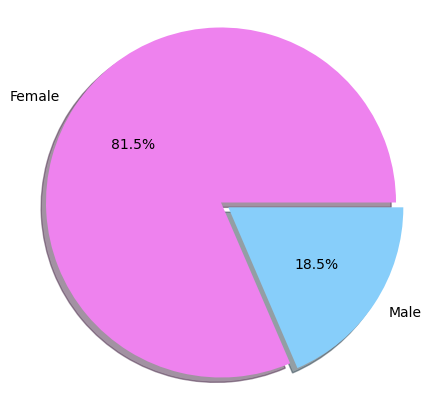

In [957]:
gender = df['Gender'].value_counts()
print(gender)
plt.figure(figsize=(5,5))
color = ['violet','lightskyblue']
explode = [0,0.05]
plt.pie(gender,labels=gender.index,colors=color,autopct='%1.1f%%',explode=explode,shadow=True)
plt.axis('equal')
plt.show()

# Emirates

The Numbers of Registered Students by Emirate

Abu Dhabi         8953
Ras al-Khaimah    1504
Fujairah          1354
Sharjah            819
Dubai              683
Ajman              335
Umm al-Qaiwain     152
No answer            9
Name: Emirate, dtype: int64


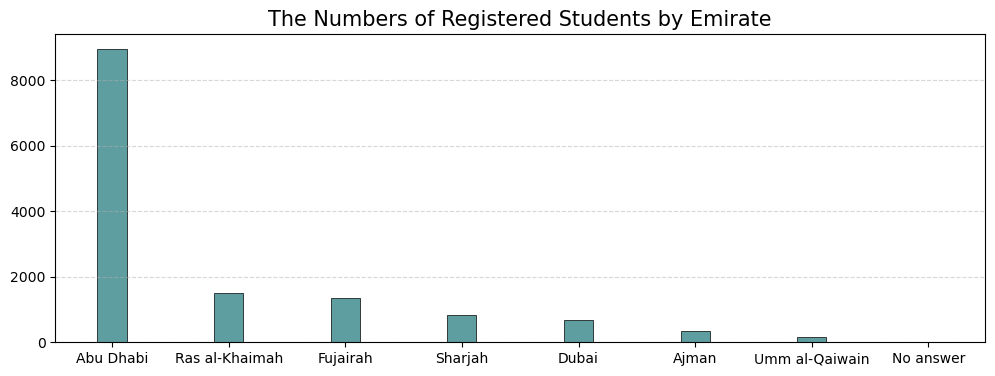

In [958]:
emirate = df['Emirate'].value_counts()
print(emirate)
plt.figure(figsize=(12,4))
plt.bar(emirate.index,emirate,color='cadetblue',width=0.25,edgecolor='k',linewidth=0.5) 
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.title('The Numbers of Registered Students by Emirate',fontsize=15)
plt.show()

# Groups

The Numbers of Registered Students by Group

National                      10860
Other Arab                     1590
Children of National Women      740
Others                          342
GCC                             277
Name: Group, dtype: int64


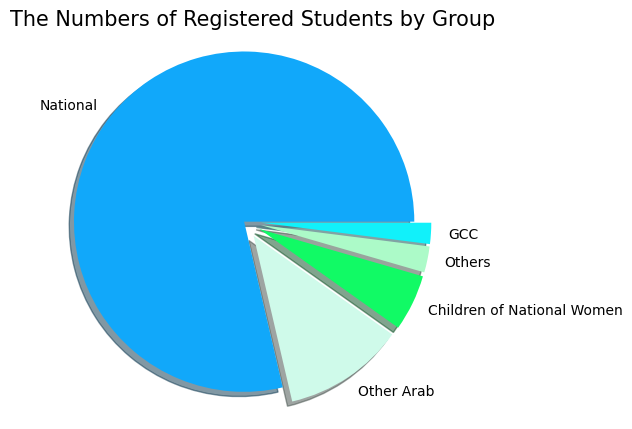

In [959]:
group = df['Group'].value_counts()
print(group)
plt.figure(figsize=(5,5) )
color = ['#11A8FA','#CFFAEA','#11FA65','#ACFAC8','#11F1FA']
explode = [0,0.1,0.1,0.1,0.1]
plt.pie(group,labels=group.index,explode=explode,colors=color,shadow=True)
plt.axis('equal')
plt.title('The Numbers of Registered Students by Group',fontsize=15)
plt.show()

* Gender by Emirate

In [960]:
gender_emirate = df.pivot_table(index='Emirate',columns='Gender',aggfunc='size').fillna(0).astype(int)
gender_emirate['Total'] = df['Emirate'].value_counts()
gender_emirate.sort_values(by='Total',ascending= False,inplace=True)
gender_emirate.columns.name = ''
gender_emirate

,Female,Male,Total
Emirate,,,
Abu Dhabi,7062,1891,8953
Ras al-Khaimah,1382,122,1504
Fujairah,1230,124,1354
Sharjah,663,156,819
Dubai,508,175,683
Ajman,265,70,335
Umm al-Qaiwain,132,20,152
No answer,7,2,9


* Gender by Group

In [961]:
gender_group = df.pivot_table(index='Group',columns='Gender',aggfunc='size').fillna(0).astype(int)
gender_group['Total'] = df['Group'].value_counts()
gender_group.sort_values(by='Total',ascending= False,inplace=True)
gender_group.columns.name = ''
gender_group

,Female,Male,Total
Group,,,
National,9332,1528,10860
Other Arab,979,611,1590
Children of National Women,547,193,740
Others,173,169,342
GCC,218,59,277


* Group by Emirate

In [962]:
group_emirate =df.pivot_table(index='Emirate', columns='Group', aggfunc='size').fillna(0).astype(int)
group_emirate['Total'] = df['Emirate'].value_counts()
group_emirate.sort_values(by ='Total',ascending= False,inplace=True)
group_emirate.columns.name = ''
group_emirate

,Children of National Women,GCC,National,Other Arab,Others,Total
Emirate,,,,,,
Abu Dhabi,498,231,6615,1322,287,8953
Ras al-Khaimah,61,10,1401,29,3,1504
Fujairah,15,8,1306,25,0,1354
Sharjah,57,5,679,64,14,819
Dubai,57,5,539,56,26,683
Ajman,39,11,205,68,12,335
Umm al-Qaiwain,13,3,113,23,0,152
No answer,0,4,2,3,0,9


# Nationalities

In [963]:
nationality = df['Nationality'].value_counts().rename('Total').to_frame()
nationality['Percentage'] = ((nationality/len(df))*100).round(2)
nationality.columns.name = 'Nationality'
nationality

Nationality,Total,Percentage
United Arab Emirates,10860,78.64
Oman,485,3.51
Jordan,325,2.35
Palestine,306,2.22
Yemen,302,2.19
Syria,239,1.73
Egypt,195,1.41
Sudan,169,1.22
Comoros Islands,123,0.89
Pakistan,92,0.67


# Degrees

BS    12834
MS      784
DR      188
PR        3
Name: Degree, dtype: int64


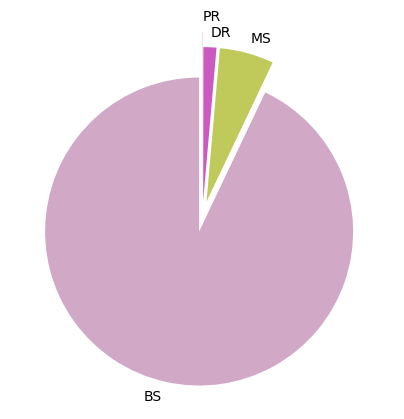

In [964]:
degree = df['Degree'].value_counts()
print(degree)
plt.figure(figsize=(5,5))
explode = [0.1,0.1,0.1,0.2]
colors = ['#d1a9c7','#c0ca5a','#ca5ac0','#ca645a']
plt.pie(degree,labels=degree.index,colors=colors,explode=explode,startangle=90)
plt.show()

* Degree by Gender

In [965]:
degree_gender = df.pivot_table(index='Degree',columns='Gender',aggfunc='size').fillna(0).astype(int)
degree_gender['Total'] = degree_gender['Female'] + degree_gender['Male']
degree_gender.sort_values(by='Total',ascending= False,inplace=True)
degree_gender.columns.name=''
degree_gender

,Female,Male,Total
Degree,,,
BS,10607,2227,12834
MS,520,264,784
DR,119,69,188
PR,3,0,3


* Degree by Emirate

In [966]:
degree_emirate = df.pivot_table(index='Emirate',columns='Degree',aggfunc='size').fillna(0).astype(int)
degree_emirate['Total'] = df['Emirate'].value_counts() 
degree_emirate.sort_values(by='Total',ascending= False,inplace=True)
degree_emirate.columns.name=''
degree_emirate

,BS,DR,MS,PR,Total
Emirate,,,,,
Abu Dhabi,8170,141,639,3,8953
Ras al-Khaimah,1477,5,22,0,1504
Fujairah,1337,4,13,0,1354
Sharjah,767,9,43,0,819
Dubai,615,23,45,0,683
Ajman,315,4,16,0,335
Umm al-Qaiwain,149,1,2,0,152
No answer,4,1,4,0,9


* Degree by Group

In [967]:
degree_group = df.pivot_table(index='Group',columns='Degree',aggfunc='size').fillna(0).astype(int)
degree_group['Total'] = df['Group'].value_counts()
degree_group.sort_values(by='Total',ascending=False,inplace=True)
degree_group.columns.name=''
degree_group

,BS,DR,MS,PR,Total
Group,,,,,
National,10332,87,441,0,10860
Other Arab,1304,49,234,3,1590
Children of National Women,740,0,0,0,740
Others,220,41,81,0,342
GCC,238,11,28,0,277


# Colleges

Humanities & Social Sciences    4039
Engineering                     2672
Business & Economics            2328
Science                         1190
Law                              953
Information Technology           724
Food & Agriculture               665
Medicine & Health Sciences       623
Education                        615
Name: College, dtype: int64


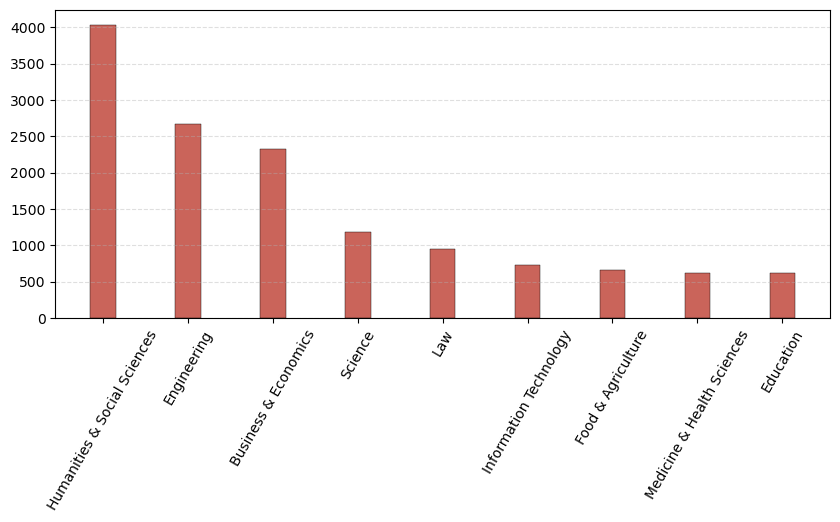

In [968]:
college = df['College'].value_counts()
print(college)
plt.figure(figsize=(10,4))
plt.bar(college.index,college,width= 0.3,color='#ca645a',edgecolor='k',linewidth=0.3)
plt.grid(axis='y',linestyle='--',alpha=0.4)
plt.xticks(rotation= 60) 
plt.show()

* College by Gender

Gender                        Female  Male
College                                   
Business & Economics            1779   549
Education                        604    11
Engineering                     1825   847
Food & Agriculture               607    58
Humanities & Social Sciences    3732   307
Information Technology           566   158
Law                              674   279
Medicine & Health Sciences       477   146
Science                          985   205


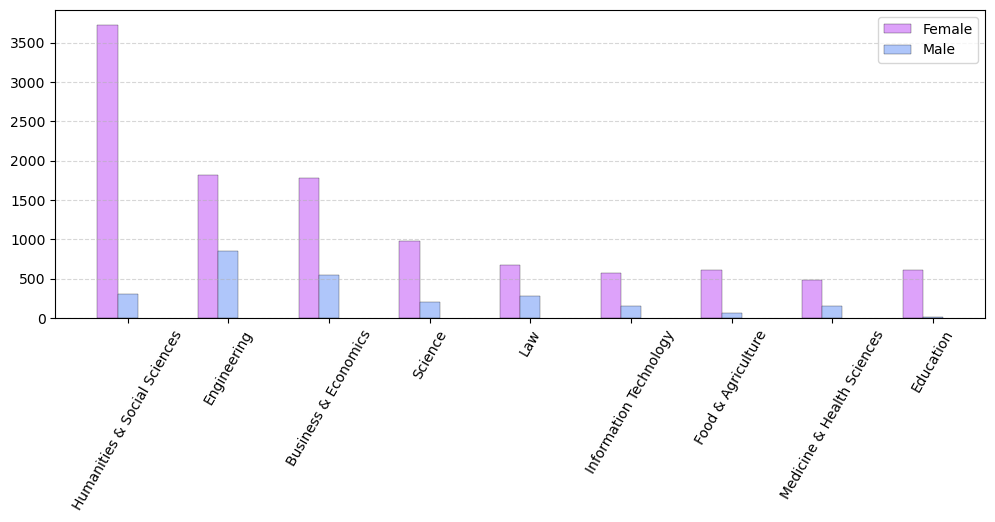

In [969]:
college_gender = df.pivot_table(index='College',columns='Gender',aggfunc='size').fillna(0).astype(int)
print(college_gender)
college_gender['Total'] = college_gender['Female'] + college_gender['Male']
college_gender.sort_values(by='Total',ascending= False,inplace=True)
plt.figure(figsize=(12,4))
x = np.arange(len(college_gender))
width = 0.2
plt.bar(x-width,college_gender['Female'],label='Female',width=width,color='#DDA2FA',edgecolor='black',linewidth=0.2)
plt.bar(x,college_gender['Male'],label='Male',width=width,color='#AFC6FA',edgecolor='black',linewidth=0.2)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.xticks(x,college_gender.index,rotation = 60)
plt.legend()
plt.show()

* College by Emirate

In [970]:
college_emirate = df.pivot_table(index='College',columns='Emirate',aggfunc='size').fillna(0).astype(int)
college_emirate['Total'] = df['College'].value_counts() 
college_emirate.sort_values(by='Total',ascending=False,inplace=True)
college_emirate.columns.name=''
college_emirate

,Abu Dhabi,Ajman,Dubai,Fujairah,No answer,Ras al-Khaimah,Sharjah,Umm al-Qaiwain,Total
College,,,,,,,,,
Humanities & Social Sciences,2563,93,139,428,3,547,230,36,4039
Engineering,1551,70,155,355,0,267,251,23,2672
Business & Economics,1841,49,47,140,0,160,67,24,2328
Science,670,48,103,145,0,132,73,19,1190
Law,639,25,74,65,1,101,35,13,953
Information Technology,424,10,30,92,0,110,49,9,724
Food & Agriculture,462,15,43,51,2,51,36,5,665
Medicine & Health Sciences,381,13,75,36,0,47,59,12,623
Education,422,12,17,42,3,89,19,11,615


* College by Group

In [971]:
college_group = df.pivot_table(index='College',columns='Group',aggfunc='size').fillna(0).astype(int)
college_group['Total'] = df['College'].value_counts() 
college_group.sort_values(by='Total',ascending=False,inplace=True)
college_group.columns.name = ''
college_group

,Children of National Women,GCC,National,Other Arab,Others,Total
College,,,,,,
Humanities & Social Sciences,216,78,3376,303,66,4039
Engineering,154,21,2026,382,89,2672
Business & Economics,112,56,1778,323,59,2328
Science,45,38,708,331,68,1190
Law,68,38,796,44,7,953
Information Technology,40,1,672,7,4,724
Food & Agriculture,34,12,508,100,11,665
Medicine & Health Sciences,42,4,510,37,30,623
Education,29,29,486,63,8,615


# Programs

* Humanities & Social Sciences College

In [972]:
Humanities_college = df[df['College']=='Humanities & Social Sciences']
Humanities = Humanities_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
Humanities.sort_values(by='Total',ascending=False,inplace=True)
Humanities.reset_index(drop=True)

,Degree,Program,Total
0,BS,Pre_Humanities & Social Sc.,1788
1,BS,Sociology,344
2,BS,Geography,324
3,BS,Mass Communication,264
4,BS,Political Science,212
5,BS,Social Work,188
6,BS,Tourism Studies,183
7,BS,Psychology,130
8,BS,History,130
9,BS,English Literature,129


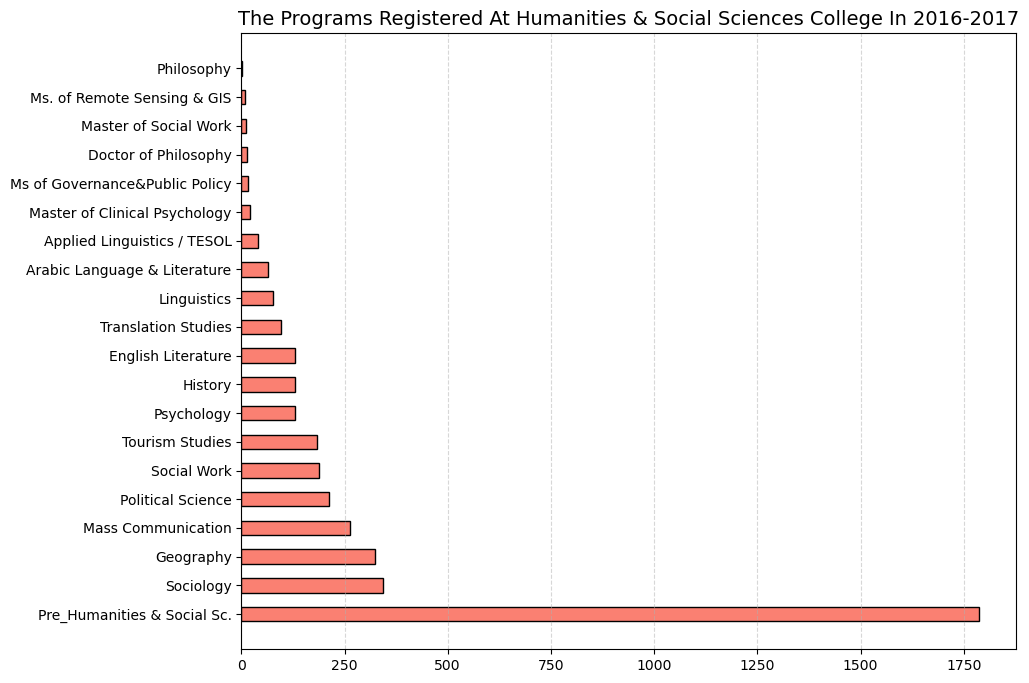

In [973]:
plt.figure(figsize=(10,8))
plt.barh(Humanities['Program'],Humanities['Total'],color='salmon',height=0.5,edgecolor='k',linewidth=1)
plt.title("The Programs Registered At Humanities & Social Sciences College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

* Engineering College

In [974]:
Engineering_college = df[df['College']=='Engineering']
Engineering = Engineering_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
Engineering.sort_values(by='Total',ascending=False,inplace=True)
Engineering.reset_index(drop=True)

,Degree,Program,Total
0,BS,Pre_Engineering,741
1,BS,Chemical Engineering,456
2,BS,Mechanical Engineering,352
3,BS,Civil Engineering,285
4,BS,Electrical Engineering,253
5,BS,Architectural Engineering,155
6,BS,Petroleum Engineering,126
7,MS,Ms of Engineering Management,98
8,BS,Communications Engineering,38
9,MS,Ms. in Electrical Engineering,31


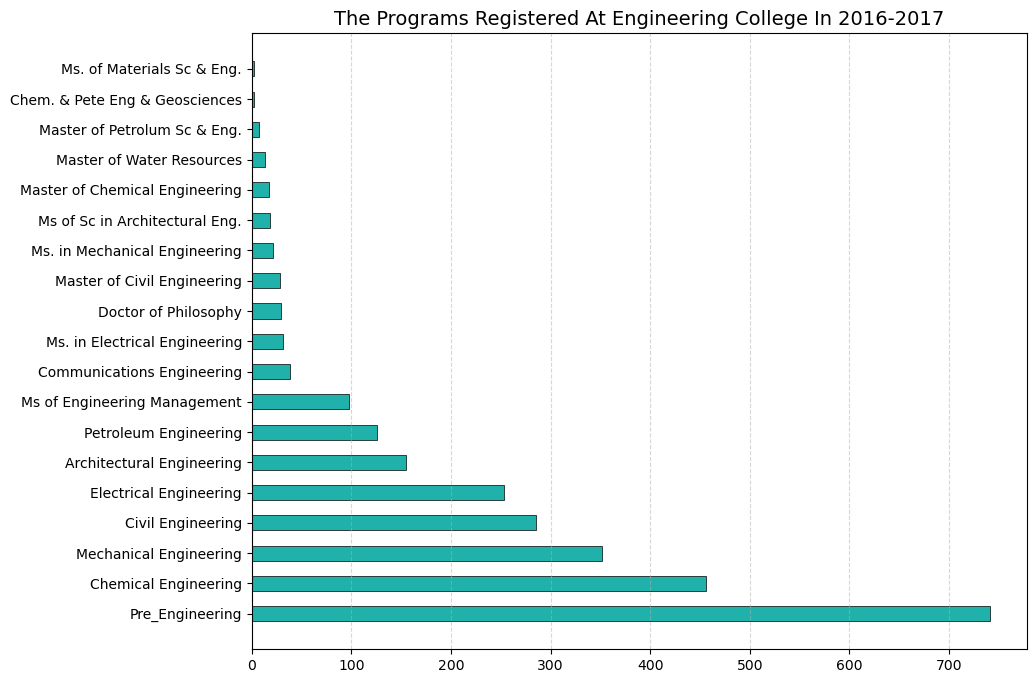

In [975]:
plt.figure(figsize=(10,8))
plt.barh(Engineering['Program'],Engineering['Total'],color='lightseagreen',height=0.5,edgecolor='k',linewidth=0.5)
plt.title("The Programs Registered At Engineering College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

* Business & Economics College

In [976]:
Business_college = df[df['College']=='Business & Economics']
Business = Business_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
Business.sort_values(by='Total',ascending=False,inplace=True)
Business.reset_index(drop=True)

,Degree,Program,Total
0,BS,Pre_Business & Economics,979
1,BS,Business Administration,542
2,BS,Accounting,228
3,BS,Finance & Banking,166
4,MS,Master of Business Admin,133
5,BS,Management Information Systems,92
6,BS,Economics,67
7,DR,DR of Business Administration,56
8,BS,Statistics,47
9,MS,Ms. of Professional Accounting,18


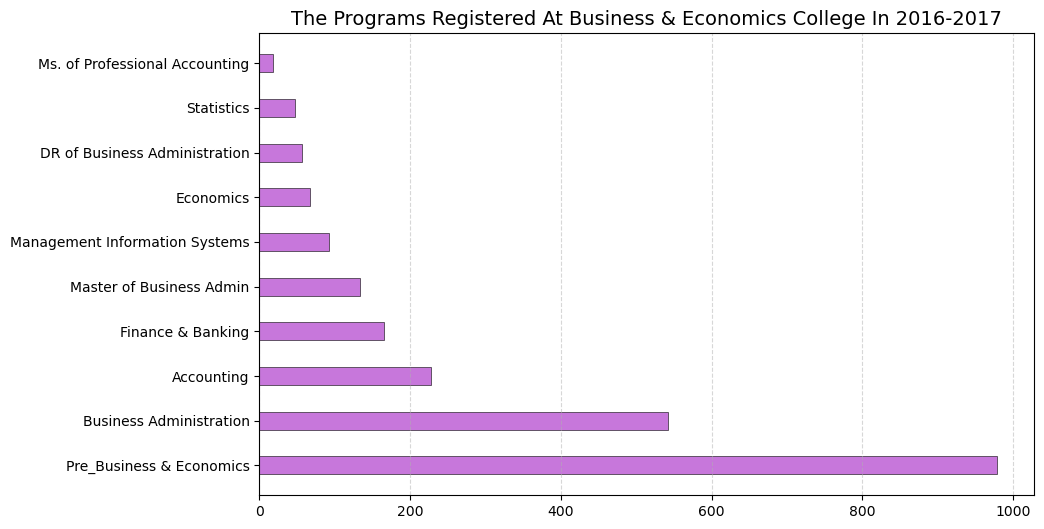

In [977]:
plt.figure(figsize=(10,6))
plt.barh(Business['Program'],Business['Total'],color='mediumorchid',height=0.4,edgecolor='k',linewidth=0.5,alpha=0.8)
plt.title("The Programs Registered At Business & Economics College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

* Science College

In [978]:
Science_college = df[df['College']=='Science']
Science = Science_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
Science.sort_values(by='Total',ascending=False,inplace=True)
Science.reset_index(drop=True)

,Degree,Program,Total
0,BS,Biology,379
1,BS,Chemistry,210
2,BS,Geology,133
3,BS,Pre_Sciences,120
4,BS,Biochemistry,109
5,BS,Mathematics,93
6,BS,Physics,40
7,MS,Ms. of Environmental Sciences,34
8,MS,Molecular Biol & Biotechnology,25
9,MS,Master of Science in Chemistry,24


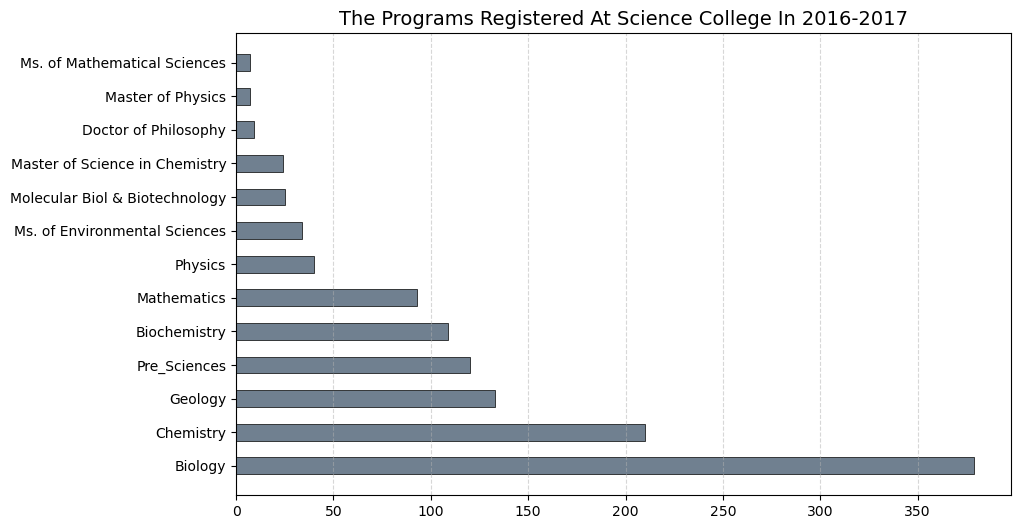

In [979]:
plt.figure(figsize=(10,6))
plt.barh(Science['Program'],Science['Total'],color='slategray',height=0.5,edgecolor='k',linewidth=0.5)
plt.title("The Programs Registered At Science College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

* Law College

In [980]:
Law_college= df[df['College']=='Law']
Law = Law_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
Law.sort_values(by='Total',ascending=False,inplace=True)
Law.reset_index(drop=True)

,Degree,Program,Total
0,BS,Pre_Law,461
1,BS,Law,417
2,MS,Master in Public Law,46
3,MS,Master in Private Law,29


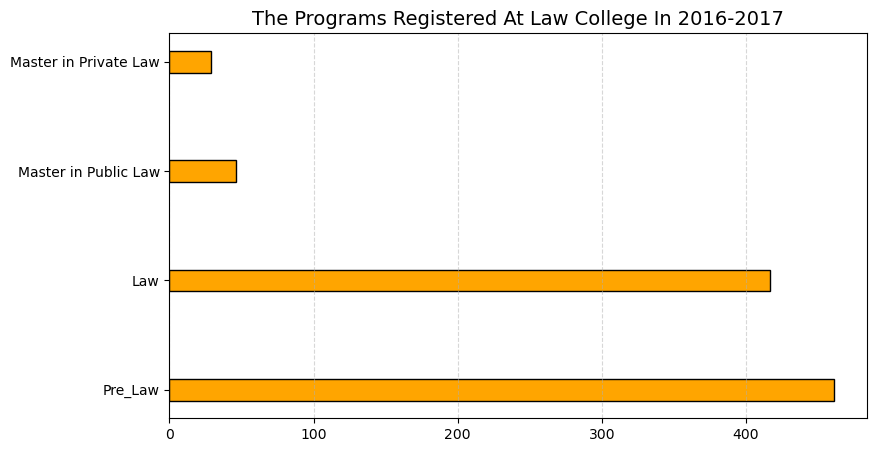

In [981]:
plt.figure(figsize=(9,5))
plt.barh(Law['Program'],Law['Total'],color ='orange',height=0.2,edgecolor='k',linewidth=1)
plt.title("The Programs Registered At Law College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

* Information Technology College

In [982]:
IT_college = df[df['College']=='Information Technology']
IT = IT_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
IT.sort_values(by='Total',ascending=False,inplace=True)
IT.reset_index(drop=True)

,Degree,Program,Total
0,BS,Pre_Information Technology,375
1,BS,Information Technology,180
2,BS,Information Security,87
3,BS,Computer Engineering,27
4,BS,Computer Science,18
5,MS,Master of Information Security,11
6,MS,Master of Software Engineering,10
7,MS,Master of IT Management,9
8,DR,Doctor of Philosophy,7


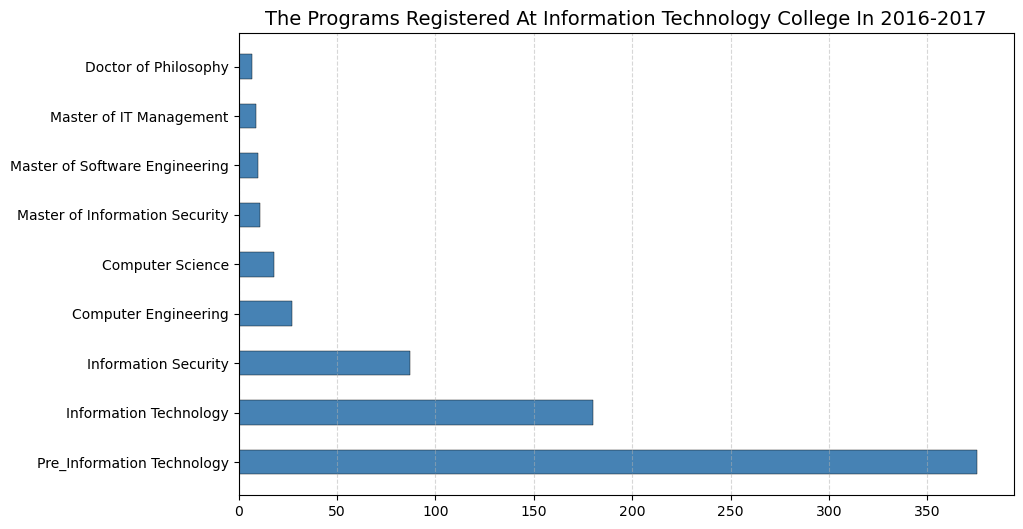

In [983]:
plt.figure(figsize=(10,6))
plt.barh(IT['Program'],IT['Total'],color='steelblue',height=0.5,edgecolor='k',linewidth=0.3)
plt.title("The Programs Registered At Information Technology College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

* Food & Agriculture College

In [984]:
Food_Agri_college = df[df['College']=='Food & Agriculture']
Food_Agri = Food_Agri_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
Food_Agri.sort_values(by='Total',ascending=False,inplace=True)
Food_Agri.reset_index(drop=True)

,Degree,Program,Total
0,BS,Pre_Food & Agriculture,133
1,BS,Horticulture,85
2,BS,Nutritional Science,85
3,BS,Agribusiness,83
4,BS,Veterinary Medicine,80
5,BS,Food Science,79
6,BS,Dietetics,61
7,MS,Master of Horticultural,18
8,BS,Marine Fisheries & Animal Sc.,16
9,MS,MS of Science in Food Science,13


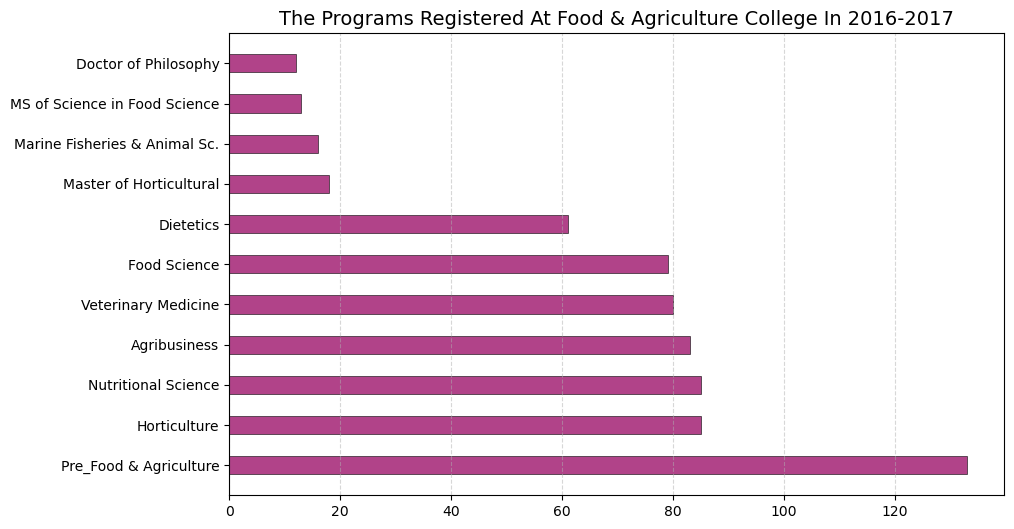

In [985]:
plt.figure(figsize=(10,6))
plt.barh(Food_Agri['Program'],Food_Agri['Total'],color='#9E146C',height=0.45,edgecolor='k',linewidth=0.5,alpha=0.8)
plt.title("The Programs Registered At Food & Agriculture College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

* Medicine & Health Sciences College

In [986]:
Medicine_college= df[df['College']=='Medicine & Health Sciences']
Medicine = Medicine_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
Medicine.sort_values(by='Total',ascending=False,inplace=True)
Medicine.reset_index(drop=True)

,Degree,Program,Total
0,BS,Pre_Medicine & Health Sciences,351
1,BS,Medicine and Surgery,165
2,DR,Doctor of Philosophy,42
3,MS,Master of Public Health,31
4,BS,Doctor of Medicine,14
5,MS,Master of Medical Sciences,11
6,BS,Medical Sciences,6
7,PR,Professional DoctorOf Pharmacy,3


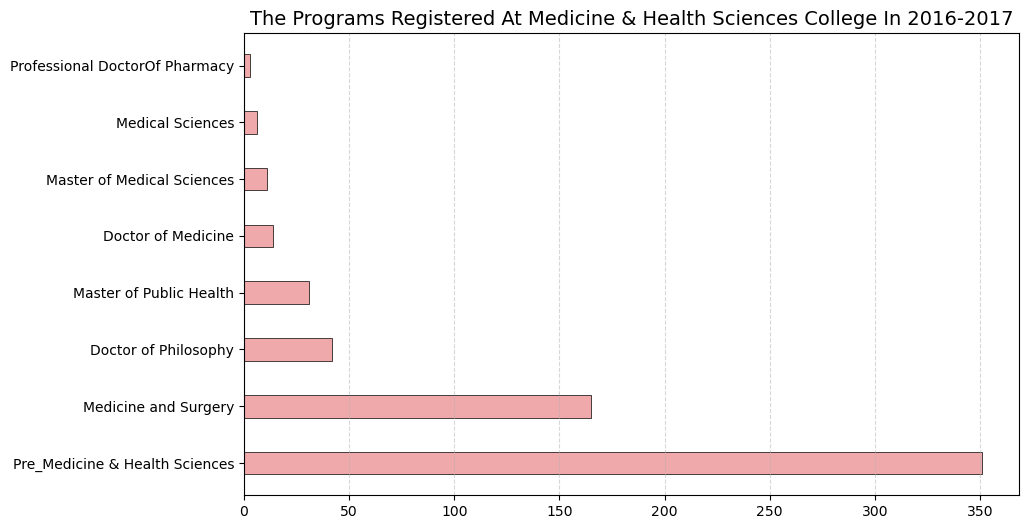

In [987]:
plt.figure(figsize=(10,6))
plt.barh(Medicine['Program'],Medicine['Total'],color='#EFA9AB',height=0.4,edgecolor='k',linewidth=0.5)
plt.title("The Programs Registered At Medicine & Health Sciences College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

* Education College

In [988]:
Education_college = df[df['College']=='Education']
Education = Education_college.groupby(['Degree','Program']).size().rename('Total').reset_index()
Education.sort_values(by='Total',ascending=False,inplace=True)
Education.reset_index(drop=True)

,Degree,Program,Total
0,BS,Early Childhood,179
1,BS,Pre_Education,114
2,BS,Special Education,109
3,BS,Elementary Education,97
4,MS,Master of Education,66
5,BS,Art Education,22
6,DR,Doctor of Philosophy,20
7,BS,Preparatory & Secondary Educ.,8


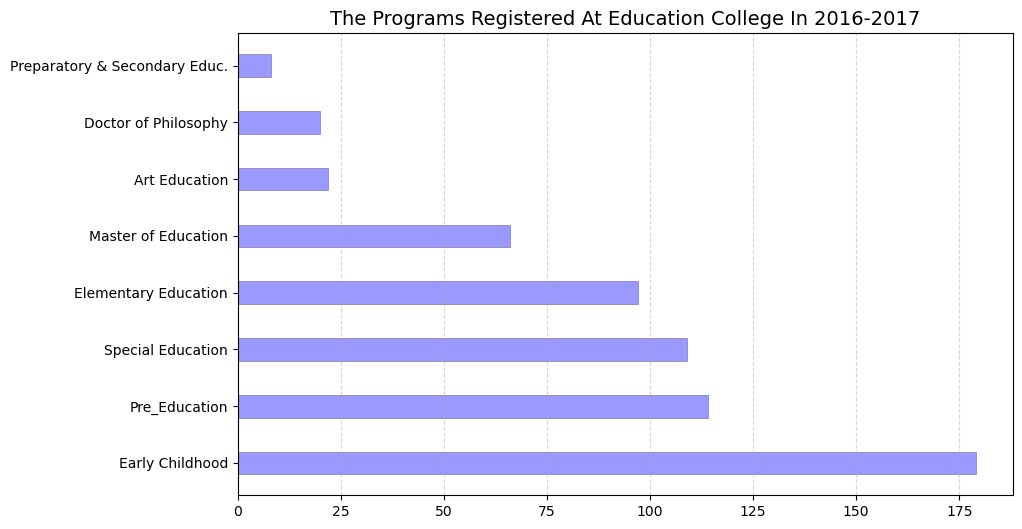

In [989]:
plt.figure(figsize=(10,6))
plt.barh(Education['Program'],Education['Total'],color='blue',edgecolor='k',height=0.4,linewidth=0.5,alpha=0.4)
plt.title("The Programs Registered At Education College In 2016-2017",fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

The Most Bachelor's Programs Registered at UAEU in 2016-2017

Program
Pre_Humanities & Social Sc.    1788
Pre_Business & Economics        979
Pre_Engineering                 741
Business Administration         542
Pre_Law                         461
Chemical Engineering            456
Law                             417
Biology                         379
Pre_Information Technology      375
Mechanical Engineering          352
Name: Program, dtype: int64


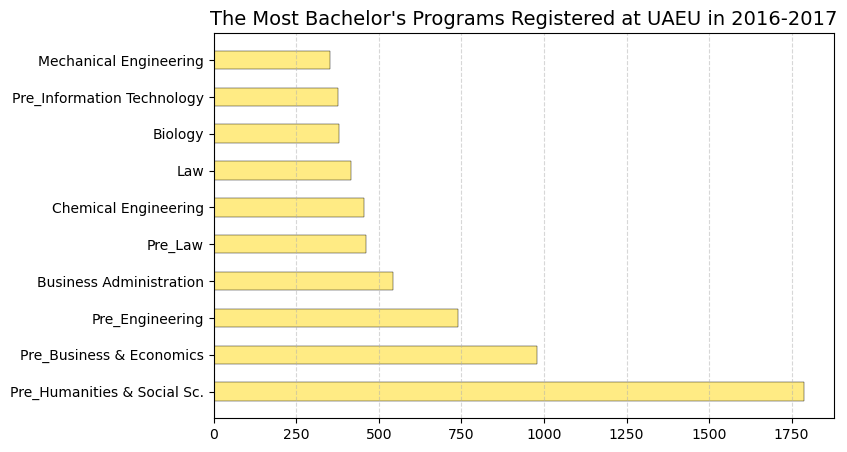

In [990]:
degrees = df.groupby('Degree')
BS = degrees['Program'].value_counts()['BS'].head(10)
print(BS)
plt.figure(figsize=(8,5))
plt.barh(BS.index,BS,color='#ffeb84',height=0.5,linewidth=0.3,edgecolor='k')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title("The Most Bachelor's Programs Registered at UAEU in 2016-2017",fontsize=14)
plt.show()

The Most Master's Programs Registered at UAEU in 2016-2017

Program
Master of Business Admin          133
Ms of Engineering Management       98
Master of Education                66
Master in Public Law               46
Ms. of Environmental Sciences      34
Master of Public Health            31
Ms. in Electrical Engineering      31
Master in Private Law              29
Master of Civil Engineering        28
Molecular Biol & Biotechnology     25
Name: Program, dtype: int64


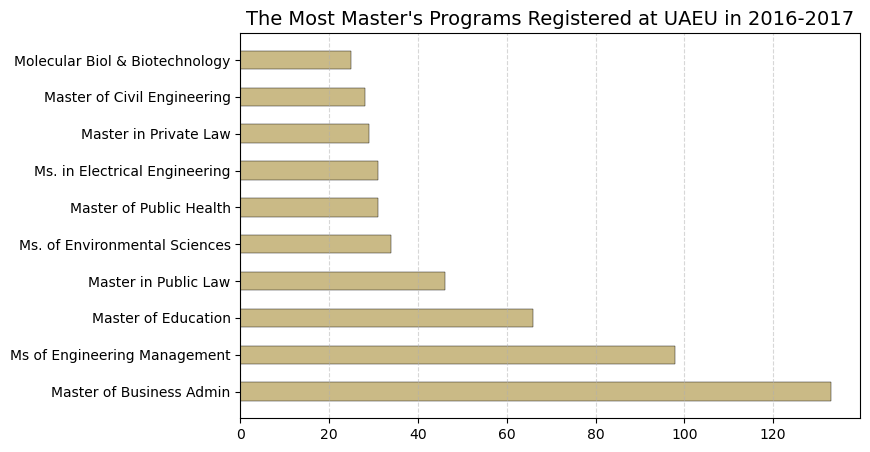

In [991]:
MS = degrees['Program'].value_counts()['MS'].head(10)
print(MS)
plt.figure(figsize=(8,5))
plt.barh(MS.index,MS,color='#caba86',height=0.5,edgecolor='k',linewidth=0.3)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.title("The Most Master's Programs Registered at UAEU in 2016-2017",fontsize=14)
plt.show()

Doctoral Programs Registered at UAEU in 2016-2017

Program
Doctor of Philosophy             132
DR of Business Administration     56
Name: Program, dtype: int64


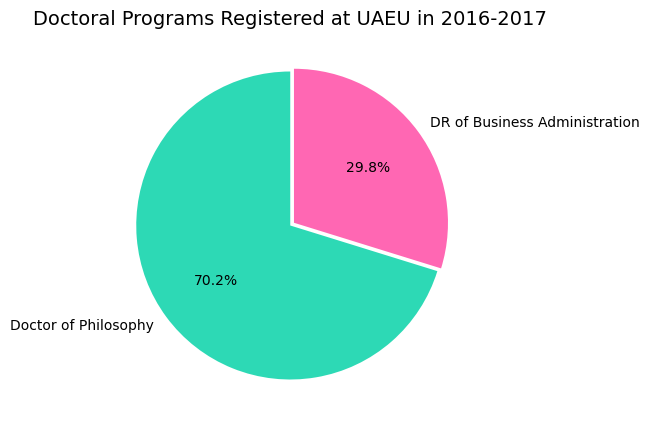

In [992]:
DR = degrees['Program'].value_counts()['DR']
print(DR)
plt.figure(figsize=(5,5))
colors= ['#2dd9b5','#ff67b3']
explode= [0,0.03]
plt.pie(DR,labels=DR.index,autopct='%1.1f%%',colors=colors,explode=explode,startangle=90)
plt.title("Doctoral Programs Registered at UAEU in 2016-2017",fontsize=14)
plt.show()

The Most Bachelor's Programs Registered by Gender

In [993]:
BS = df[df['Degree']=='BS']
BS_gender = BS.pivot_table(index='Program',columns='Gender',aggfunc='size').fillna(0).astype(int)

for i in BS_gender.columns :
    top = BS_gender.sort_values(by=i,ascending=False).head(10)
    print(f"{i}:\n\n{top[i]}\n{'_'*35}\n\n")

Female:

Program
Pre_Humanities & Social Sc.    1660
Pre_Business & Economics        809
Pre_Engineering                 497
Business Administration         409
Chemical Engineering            370
Biology                         363
Pre_Law                         361
Sociology                       344
Pre_Information Technology      281
Geography                       279
Name: Female, dtype: int64
___________________________________


Male:

Program
Pre_Engineering                   244
Mechanical Engineering            189
Pre_Business & Economics          170
Law                               139
Business Administration           133
Pre_Humanities & Social Sc.       128
Pre_Law                           100
Pre_Information Technology         94
Chemical Engineering               86
Pre_Medicine & Health Sciences     78
Name: Male, dtype: int64
___________________________________




The Most Master's Programs Registered by Gender

In [994]:
MS = df[df['Degree']=='MS']
MS_gender = MS.pivot_table(index='Program',columns='Gender',aggfunc='size').fillna(0).astype(int)
lst=['Female','Male']
for i in lst :
    top = MS_gender.sort_values(by=i,ascending=False).head(10)
    print(f"{i}:\n\n{top[i]}\n{'_'*35}\n\n")

Female:

Program
Master of Business Admin          91
Master of Education               60
Ms of Engineering Management      51
Ms. of Environmental Sciences     26
Master of Public Health           24
Molecular Biol & Biotechnology    23
Master in Public Law              21
Master of Clinical Psychology     20
Ms of Sc in Architectural Eng.    17
Ms. in Electrical Engineering     16
Name: Female, dtype: int64
___________________________________


Male:

Program
Ms of Engineering Management      47
Master of Business Admin          42
Master in Public Law              25
Master of Civil Engineering       17
Master in Private Law             15
Ms. in Electrical Engineering     15
Ms. in Mechanical Engineering     12
Master of Horticultural           10
Master of Science in Chemistry     9
Master of Water Resources          9
Name: Male, dtype: int64
___________________________________




Doctoral Programs by Gender

Female:

Program
Doctor of Philosophy             95
DR of Business Administration    24
Name: Female, dtype: int64
___________________________________


Male:

Program
Doctor of Philosophy             37
DR of Business Administration    32
Name: Male, dtype: int64
___________________________________




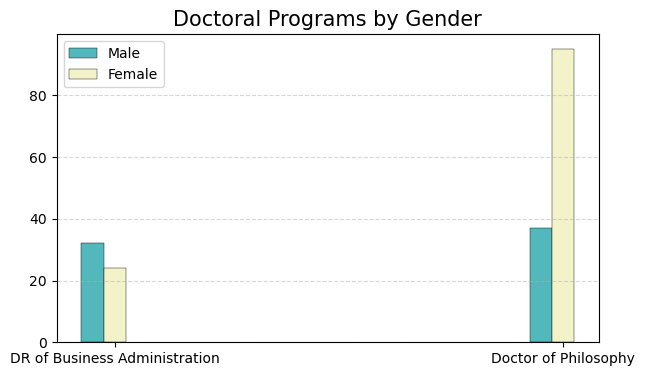

In [995]:
DR = df[df['Degree']=='DR']
DR_gender = DR.pivot_table(index='Program',columns='Gender',aggfunc='size').fillna(0).astype(int)
for i in lst :
    top = DR_gender.sort_values(by=i,ascending=False)
    print(f"{i}:\n\n{top[i]}\n{'_'*35}\n\n")

x = np.arange(2)
width = 0.05
plt.figure(figsize=(7,4))
plt.bar(x-width,DR_gender['Male'],label='Male',width=width,color='#53B8BB',edgecolor='k',linewidth=0.3)
plt.bar(x,DR_gender['Female'],label='Female',width=width,color='#F3F2C9',edgecolor='k',linewidth=0.3)
plt.xticks(x,DR_gender.index)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.title('Doctoral Programs by Gender',fontsize=15)
plt.legend()
plt.show()

The Most Bachelor's Programs Registered by Emirate

In [996]:
lst = ['Abu Dhabi','Ras al-Khaimah','Fujairah','Sharjah','Dubai','Ajman','Umm al-Qaiwain']
BS_emirate = BS.pivot_table(index='Program',columns='Emirate',aggfunc='size').fillna(0).astype(int)
for i in lst:
    top = BS_emirate.sort_values(by=i,ascending=False).head(4)
    print(f"{i}:\n\n{top[i]}\n{'_'*35}\n\n")

Abu Dhabi:

Program
Pre_Humanities & Social Sc.    1114
Pre_Business & Economics        737
Business Administration         416
Pre_Engineering                 352
Name: Abu Dhabi, dtype: int64
___________________________________


Ras al-Khaimah:

Program
Pre_Humanities & Social Sc.    241
Pre_Business & Economics        88
Pre_Engineering                 85
Pre_Information Technology      59
Name: Ras al-Khaimah, dtype: int64
___________________________________


Fujairah:

Program
Pre_Humanities & Social Sc.    214
Pre_Engineering                148
Pre_Business & Economics        71
Chemical Engineering            64
Name: Fujairah, dtype: int64
___________________________________


Sharjah:

Program
Pre_Humanities & Social Sc.       104
Pre_Engineering                    88
Chemical Engineering               43
Pre_Medicine & Health Sciences     37
Name: Sharjah, dtype: int64
___________________________________


Dubai:

Program
Pre_Humanities & Social Sc.       64
Biology        

The Most Master's Programs Registered by Emirate

In [997]:
MS_emirate = MS.pivot_table(index='Program',columns='Emirate',aggfunc='size').fillna(0).astype(int)

print(f"Abu Dhabi:\n\n{MS_emirate.sort_values(by='Abu Dhabi',ascending= False)['Abu Dhabi'].head(3)}\n{'_'*35}\n\n")
print(f"Ras al-Khaimah:\n\n{MS_emirate.sort_values(by='Ras al-Khaimah',ascending= False)['Ras al-Khaimah'].head()}\n{'_'*35}\n\n")
print(f"Fujairah:\n\n{MS_emirate.sort_values(by='Fujairah',ascending= False)['Fujairah'].head(6)}\n{'_'*35}\n\n")
print(f"Sharjah:\n\n{MS_emirate.sort_values(by='Sharjah',ascending= False)['Sharjah'].head(2)}\n{'_'*35}\n\n")
print(f"Dubai:\n\n{MS_emirate.sort_values(by='Dubai',ascending= False)['Dubai'].head(3)}\n{'_'*35}\n\n")
print(f"Ajman:\n\n{MS_emirate.sort_values(by='Ajman',ascending= False)['Ajman'].head(4)}\n{'_'*35}\n\n")
print(f"Umm al-Qaiwain:\n\n{MS_emirate.sort_values(by='Umm al-Qaiwain',ascending= False)['Umm al-Qaiwain'].head(2)}\n")

Abu Dhabi:

Program
Master of Business Admin        118
Ms of Engineering Management     90
Master of Education              57
Name: Abu Dhabi, dtype: int64
___________________________________


Ras al-Khaimah:

Program
Master of Business Admin          4
Molecular Biol & Biotechnology    2
Master in Public Law              2
Master of Medical Sciences        2
Ms of Governance&Public Policy    2
Name: Ras al-Khaimah, dtype: int64
___________________________________


Fujairah:

Program
Master of Horticultural           2
Master in Public Law              2
Master of Business Admin          2
Master of Science in Chemistry    2
Ms of Engineering Management      2
Master of Education               2
Name: Fujairah, dtype: int64
___________________________________


Sharjah:

Program
Master of Science in Chemistry    4
Master of Business Admin          4
Name: Sharjah, dtype: int64
___________________________________


Dubai:

Program
Master of Business Admin          5
Master of Clinic

Doctoral Programs by Emirate

In [998]:
lst = ['Abu Dhabi','Dubai','Sharjah','Ras al-Khaimah','Fujairah','Ajman','Umm al-Qaiwain']
DR_emirate = DR.pivot_table(index='Program',columns='Emirate',aggfunc='size').fillna(0).astype(int)
for i in lst:
    top = DR_emirate.sort_values(by=i,ascending=False)
    print(f"{i}:\n\n{top[i]}\n{'_'*35}\n\n")

Abu Dhabi:

Program
Doctor of Philosophy             92
DR of Business Administration    49
Name: Abu Dhabi, dtype: int64
___________________________________


Dubai:

Program
Doctor of Philosophy             19
DR of Business Administration     4
Name: Dubai, dtype: int64
___________________________________


Sharjah:

Program
Doctor of Philosophy             7
DR of Business Administration    2
Name: Sharjah, dtype: int64
___________________________________


Ras al-Khaimah:

Program
Doctor of Philosophy             5
DR of Business Administration    0
Name: Ras al-Khaimah, dtype: int64
___________________________________


Fujairah:

Program
Doctor of Philosophy             4
DR of Business Administration    0
Name: Fujairah, dtype: int64
___________________________________


Ajman:

Program
Doctor of Philosophy             3
DR of Business Administration    1
Name: Ajman, dtype: int64
___________________________________


Umm al-Qaiwain:

Program
Doctor of Philosophy             1


The Most Bachelor's Programs Registered by Group

In [999]:
BS_group = BS.pivot_table(index='Program',columns='Group',aggfunc='size').fillna(0).astype(int)
lst = ['National','Children of National Women','GCC','Other Arab','Others']
for i in lst:
    top = BS_group.sort_values(by=i,ascending=False).head(4)
    print(f"{i}:\n\n{top[i]}\n{'_'*35}\n\n")

National:

Program
Pre_Humanities & Social Sc.    1589
Pre_Business & Economics        835
Pre_Engineering                 645
Pre_Law                         392
Name: National, dtype: int64
___________________________________


Children of National Women:

Program
Pre_Humanities & Social Sc.    99
Pre_Business & Economics       66
Pre_Engineering                62
Pre_Law                        37
Name: Children of National Women, dtype: int64
___________________________________


GCC:

Program
Pre_Humanities & Social Sc.    21
Law                            17
Sociology                      14
Pre_Business & Economics       14
Name: GCC, dtype: int64
___________________________________


Other Arab:

Program
Business Administration    105
Mass Communication          86
Chemistry                   82
Accounting                  68
Name: Other Arab, dtype: int64
___________________________________


Others:

Program
Pre_Business & Economics       23
Pre_Humanities & Social Sc.    20
P

The Most Master's Programs Registered by Group

In [1000]:
MS_group = MS.pivot_table(index='Program',columns='Group',aggfunc='size').fillna(0).astype(int)
print(f"National:\n\n{MS_group.sort_values(by='National',ascending= False)['National'].head(3)}\n{'_'*35}\n\n")
print(f"Other Arab:\n\n{MS_group.sort_values(by='Other Arab',ascending= False)['Other Arab'].head(4)}\n{'_'*35}\n\n")
print(f"Others:\n\n{MS_group.sort_values(by='Others',ascending= False)['Others'].head(3)}\n{'_'*35}\n\n")
print(f"GCC:\n\n{MS_group.sort_values(by='GCC',ascending= False)['GCC'].head(3)}\n{'_'*35}")

National:

Program
Master of Business Admin        108
Ms of Engineering Management     59
Master of Education              36
Name: National, dtype: int64
___________________________________


Other Arab:

Program
Ms of Engineering Management     32
Master of Education              26
Master of Civil Engineering      18
Ms. in Electrical Engineering    18
Name: Other Arab, dtype: int64
___________________________________


Others:

Program
Ms. in Electrical Engineering    9
Master of Clinical Psychology    8
Master of Public Health          7
Name: Others, dtype: int64
___________________________________


GCC:

Program
Master in Public Law            6
Master of Public Health         3
Ms of Engineering Management    3
Name: GCC, dtype: int64
___________________________________


Doctoral Programs by Group

In [1001]:
DR_group = DR.pivot_table(index='Program',columns='Group',aggfunc='size').fillna(0).astype(int)
lst = ['National','Other Arab','Others','GCC']
for i in lst:
    top = DR_group.sort_values(by=i,ascending=False)
    print(f"{i}:\n\n{top[i]}\n{'_'*35}\n\n")

National:

Program
DR of Business Administration    46
Doctor of Philosophy             41
Name: National, dtype: int64
___________________________________


Other Arab:

Program
Doctor of Philosophy             45
DR of Business Administration     4
Name: Other Arab, dtype: int64
___________________________________


Others:

Program
Doctor of Philosophy             40
DR of Business Administration     1
Name: Others, dtype: int64
___________________________________


GCC:

Program
Doctor of Philosophy             6
DR of Business Administration    5
Name: GCC, dtype: int64
___________________________________




# National Students

National Students by Gender

Female    9332
Male      1528
Name: Gender, dtype: int64


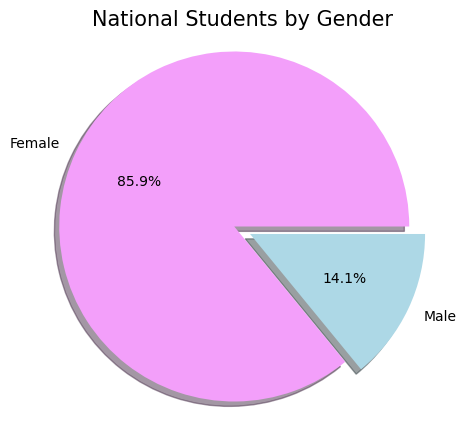

In [1002]:
national = df[df['Group']=='National']
gender = national['Gender'].value_counts()
print(gender)
plt.figure(figsize=(5,5))
colors =['#F39FFA','lightblue']
explode =[0,0.1]
plt.pie(gender,labels=gender.index,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.title('National Students by Gender',fontsize=15)
plt.axis('equal')
plt.show()

National Students by Emirate

Emirate
Abu Dhabi         6615
Ras al-Khaimah    1401
Fujairah          1306
Sharjah            679
Dubai              539
Ajman              205
Umm al-Qaiwain     113
No answer            2
Name: Total, dtype: int64


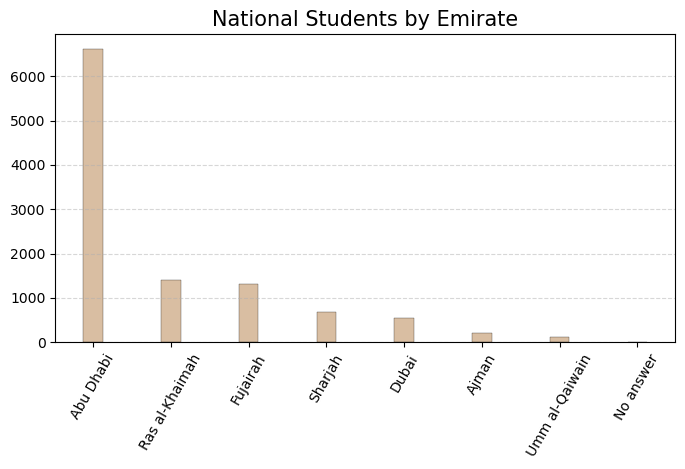

In [1003]:
emirate = national.pivot_table(index='Emirate',columns='Gender',aggfunc='size').fillna(0).astype(int)
emirate['Total']= national['Emirate'].value_counts()
emirate.sort_values(by='Total',ascending=False,inplace=True)
print(emirate['Total'])
plt.figure(figsize=(8,4))
plt.bar(emirate.index,emirate['Total'],width= 0.25,color='#d9bea2',edgecolor='k',linewidth=0.2)
plt.title('National Students by Emirate',fontsize=15)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.xticks(rotation=60) 
plt.show()   

National Students by Emirate (Male/Female)

Gender          Female  Male  Total
Emirate                            
Abu Dhabi         5568  1047   6615
Ras al-Khaimah    1306    95   1401
Fujairah          1200   106   1306
Sharjah            573   106    679
Dubai              410   129    539
Ajman              174    31    205
Umm al-Qaiwain      99    14    113
No answer            2     0      2


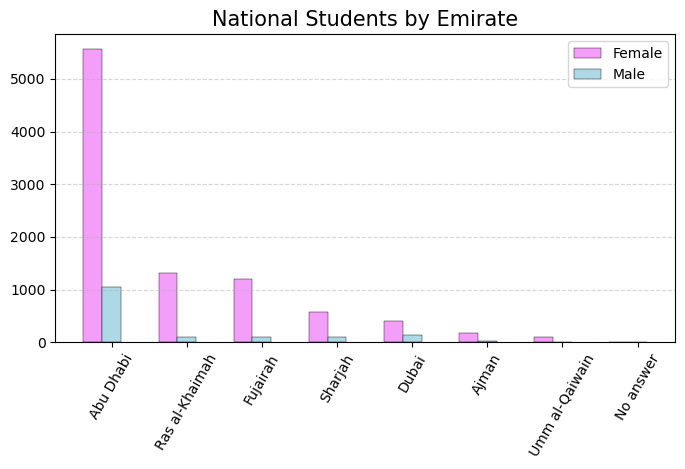

In [1004]:
print(emirate)
x = np.arange(len(emirate))
plt.figure(figsize=(8,4))
width = 0.25
plt.bar(x-width,emirate['Female'],width=width,color='#F39FFA',label='Female',edgecolor='k',linewidth=0.3)
plt.bar(x,emirate['Male'],width=width,color='lightblue',label='Male',edgecolor='k',linewidth=0.3)
plt.title('National Students by Emirate',fontsize=15)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.xticks(x,emirate.index,rotation=60)
plt.legend()
plt.show() 

National Students by Degree

Degree
BS    10332
MS      441
DR       87
Name: Total, dtype: int64


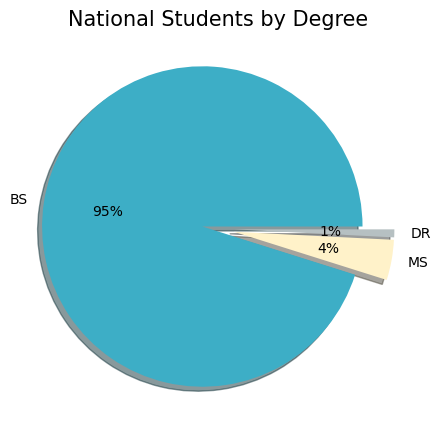

In [1005]:
degree = national.pivot_table(index='Degree',columns='Gender',aggfunc='size').fillna(0).astype(int)
degree['Total']= national['Degree'].value_counts()
degree.sort_values(by='Total',ascending=False,inplace=True)
print(degree['Total'])
plt.figure(figsize=(5,5))
color = ['#3daec6','#fff2c9','#b6c0c2']
explode = [0.1,0.1,0.1]
plt.pie(degree['Total'],labels=degree.index,colors=color,explode=explode,autopct='%1.0f%%',shadow=True)
plt.title('National Students by Degree',fontsize=15)
plt.axis('equal')
plt.show()

National Students by Degree (Male/Female)

Gender  Female  Male  Total
Degree                     
BS        8955  1377  10332
MS         325   116    441
DR          52    35     87


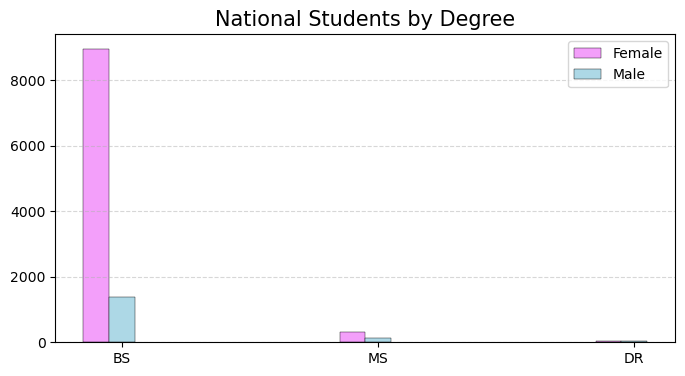

In [1006]:
print(degree)
x = np.arange(3)
width = 0.1
plt.figure(figsize=(8,4))
plt.bar(x-width,degree['Female'],width=width,color='#F39FFA',label='Female',edgecolor='k',linewidth=0.3)
plt.bar(x,degree['Male'],width=width,color='lightblue',label='Male',edgecolor='k',linewidth=0.3)
plt.title('National Students by Degree',fontsize=15)
plt.xticks(x ,degree.index)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.legend()
plt.show()

National Students by College

College
Humanities & Social Sciences    3376
Engineering                     2026
Business & Economics            1778
Law                              796
Science                          708
Information Technology           672
Medicine & Health Sciences       510
Food & Agriculture               508
Education                        486
Name: Total, dtype: int64


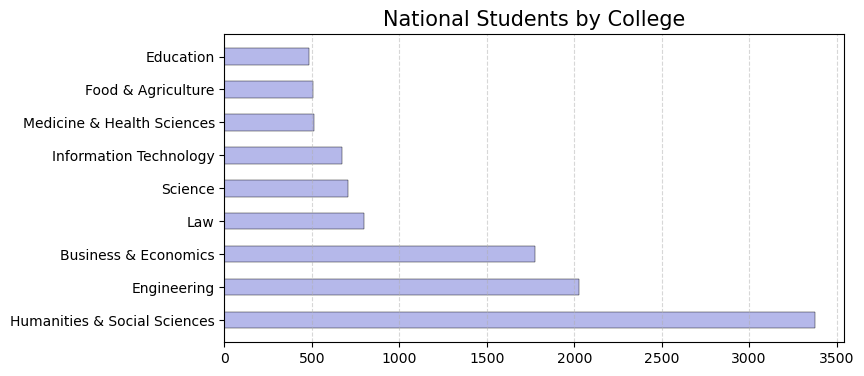

In [1007]:
college = national.pivot_table(index='College',columns='Gender',aggfunc='size').fillna(0).astype(int)
college['Total'] = national['College'].value_counts()
college.sort_values(by='Total',ascending=False,inplace=True)
print(college['Total'])
plt.figure(figsize=(8,4))
plt.barh(college.index,college['Total'],color='#b5b8ea',height=0.5,edgecolor='k',linewidth=0.3)
plt.title('National Students by College',fontsize=15)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.show()

National Students by College (Male/Female)

Gender                        Female  Male  Total
College                                          
Humanities & Social Sciences    3196   180   3376
Engineering                     1510   516   2026
Business & Economics            1476   302   1778
Law                              589   207    796
Science                          673    35    708
Information Technology           534   138    672
Medicine & Health Sciences       396   114    510
Food & Agriculture               474    34    508
Education                        484     2    486


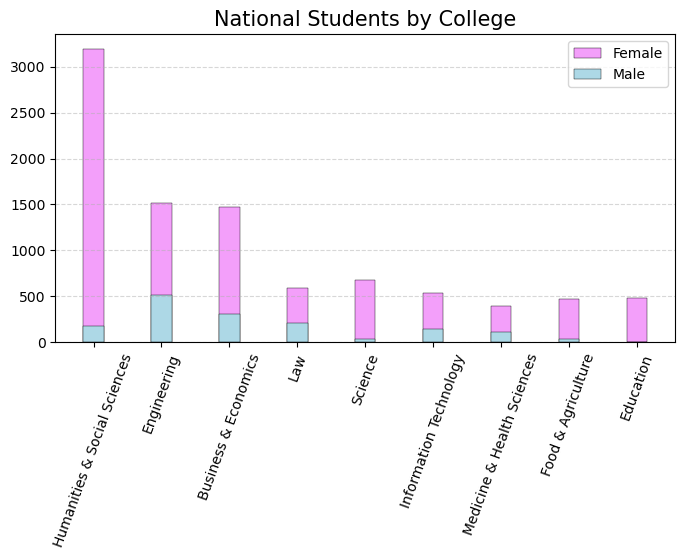

In [1008]:
print(college)
plt.figure(figsize=(8,4))
plt.bar(college.index,college['Female'],color='#F39FFA',width=0.3,label='Female',edgecolor='k',linewidth=0.3)
plt.bar(college.index,college['Male'],color='lightblue',width=0.3,label='Male',edgecolor='k',linewidth=0.3)
plt.title('National Students by College',fontsize=15)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.xticks(rotation=70)
plt.legend()
plt.show()

National Students by Programs:

The Most Bachelor's Programs Registered by National Students

Program
Pre_Humanities & Social Sc.       1589
Pre_Business & Economics           835
Pre_Engineering                    645
Pre_Law                            392
Business Administration            391
Chemical Engineering               379
Pre_Information Technology         347
Law                                344
Pre_Medicine & Health Sciences     309
Sociology                          295
Name: Total, dtype: int64


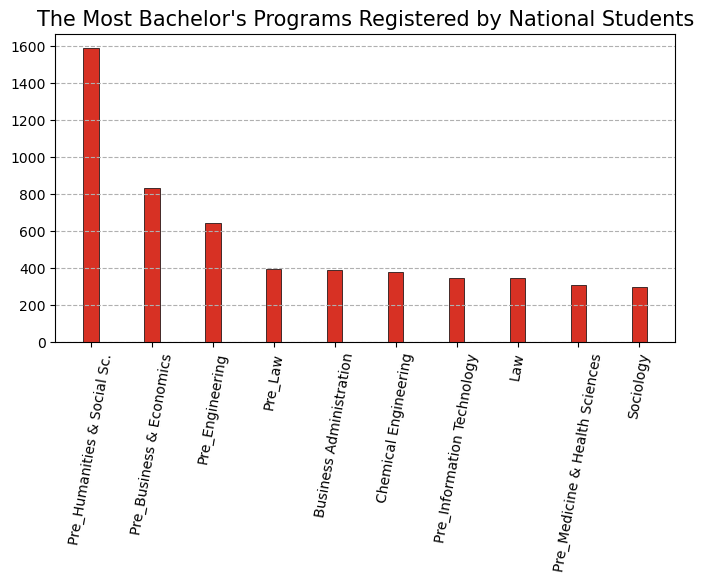

In [1012]:
bs = national[national["Degree"]=="BS"]
program = bs.pivot_table(index='Program',columns='Gender',aggfunc='size').fillna(0).astype(int)
program['Total'] = bs['Program'].value_counts()
top = program.sort_values(by='Total',ascending=False).head(10)
print(top['Total'])

plt.figure(figsize=(8,4))
plt.bar(top.index,top['Total'],color='#d73124',width=0.25,edgecolor='k',linewidth=0.5)
plt.title("The Most Bachelor's Programs Registered by National Students",fontsize=15)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=80)
plt.show()

The Most Bachelor's Programs Registered by (Male/Female) National Students

In [1013]:
lst = ['Male','Female']
for i in lst:
    top = program.sort_values(by=i,ascending=False).head(10)
    print(f"{i}:\n\n{top[i]}\n{'_'*40}\n\n")

Male:

Program
Pre_Engineering                   195
Mechanical Engineering            120
Pre_Business & Economics          116
Law                               102
Pre_Humanities & Social Sc.        91
Pre_Information Technology         80
Pre_Law                            76
Chemical Engineering               64
Pre_Medicine & Health Sciences     63
Business Administration            55
Name: Male, dtype: int64
________________________________________


Female:

Program
Pre_Humanities & Social Sc.       1498
Pre_Business & Economics           719
Pre_Engineering                    450
Business Administration            336
Pre_Law                            316
Chemical Engineering               315
Sociology                          295
Biology                            268
Pre_Information Technology         267
Pre_Medicine & Health Sciences     246
Name: Female, dtype: int64
________________________________________




The Most Master's Programs Registered by National Students

Program
Master of Business Admin        108
Ms of Engineering Management     59
Master of Education              36
Master in Public Law             35
Name: Total, dtype: int64


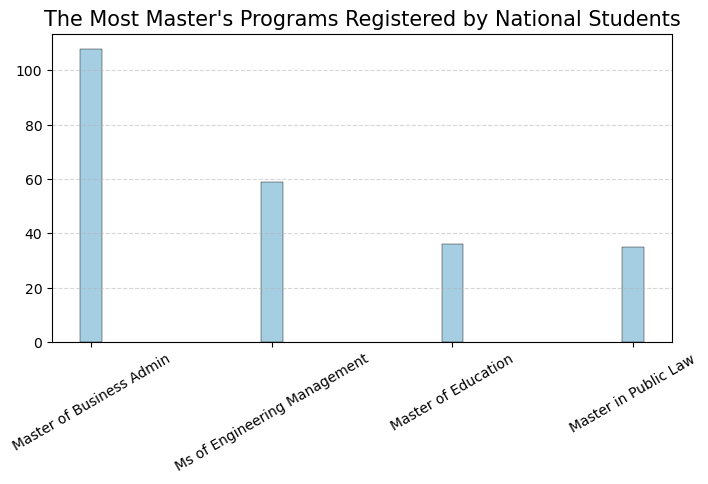

In [1014]:
ms = national[national["Degree"]=="MS"]  
program = ms.pivot_table(index='Program',columns='Gender',aggfunc='size').fillna(0).astype(int)
program['Total'] = ms['Program'].value_counts()
top = program.sort_values(by='Total',ascending=False).head(4)
print(top['Total'])
plt.figure(figsize=(8,4))
plt.bar(top.index,top['Total'],width=0.12,color='#a6cee3',edgecolor='k',linewidth=0.3)
plt.title("The Most Master's Programs Registered by National Students",fontsize=15)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.xticks(rotation = 30)
plt.show() 

The Most Master's Programs Registered by (Male/Female) National Students

In [1015]:
lst = ['Male','Female']
for i in lst:
    top = program.sort_values(by=i,ascending=False).head(4)
    print(f"{i}:\n\n{top[i]}\n{'_'*35}\n\n")

Male:

Program
Master of Business Admin        31
Ms of Engineering Management    21
Master in Public Law            16
Master in Private Law           13
Name: Male, dtype: int64
___________________________________


Female:

Program
Master of Business Admin        77
Ms of Engineering Management    38
Master of Education             35
Master in Public Law            19
Name: Female, dtype: int64
___________________________________




Doctoral Programs Registered by National Students

Program
DR of Business Administration    46
Doctor of Philosophy             41
Name: Total, dtype: int64


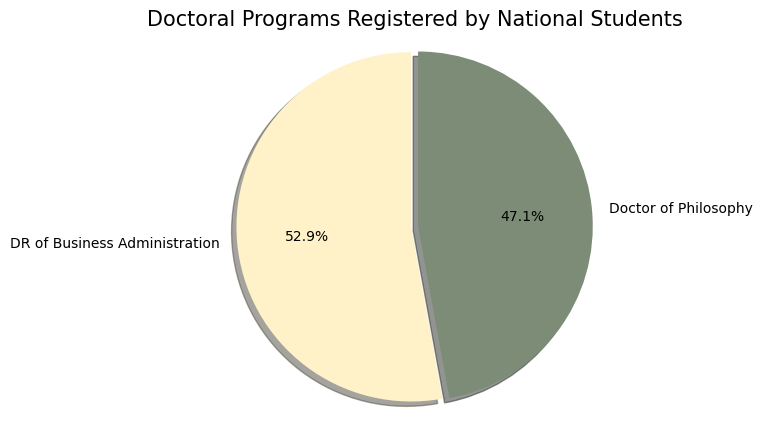

In [1016]:
dr = national[national["Degree"]=="DR"]
program = dr.pivot_table(index='Program',columns='Gender',aggfunc='size').fillna(0).astype(int)
program['Total'] = dr['Program'].value_counts()
program.sort_values(by='Total',ascending=False,inplace=True)
print(program['Total'])
plt.figure(figsize=(5,5))
color=['#fff2c9','#7c8c76']
explode = [0.04,0]
plt.pie(program['Total'],labels=program.index,colors=color,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Doctoral Programs Registered by National Students",fontsize=15)
plt.axis('equal')
plt.show()

Doctoral Programs Registered by (Male/Female) National Students

In [1017]:
program

Gender,Female,Male,Total
Program,,,
DR of Business Administration,20,26,46
Doctor of Philosophy,32,9,41
